In [1]:
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
sys.path.append(os.getcwd() + "/../")

In [2]:
import bertft

In [3]:
# Important: auto-reload of bertft module
%load_ext autoreload
%autoreload 2

In [48]:
pipeline = bertft.Pipeline(True)

Initializing fast text
Found existing model, loading.


Loading bert
Server started in 61.3924 seconds


Input:  what is the local weather forecast?
Target word: weather ; sequence:  what is the local <mask> forecast?
Bert finished in 0.1292 seconds
Unfiltered top:
             word   bert normalized ftext ftext-sentence     score
0         weather  60.59       1.00  1.00           1.00  2.000000
1     temperature  58.36       0.72  0.48           0.96  1.206398
2        rainfall  57.97       0.68  0.50           0.96  1.177300
3            snow  57.54       0.62  0.54           0.96  1.164787
4            rain  56.83       0.53  0.60           0.97  1.130214
5           storm  56.11       0.44  0.57           0.97  1.018009
6          winter  55.80       0.41  0.60           0.97  1.003941
7        forecast  56.20       0.46  0.55           0.96  1.001705
8         climate  55.72       0.40  0.55           0.96  0.941995
9   precipitation  56.80       0.53  0.40           0.95  0.933833
10           wind  55.83       0.41  0.50           0.96  0.914219
11        traffic  56.28       0.47

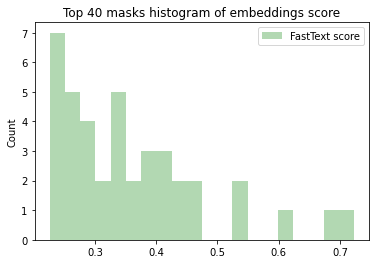

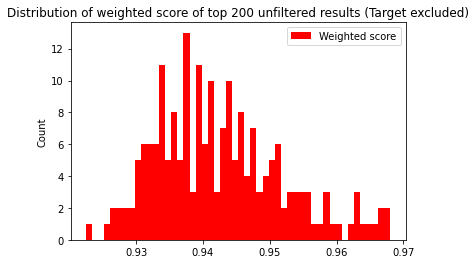

Original word position:  None ; score:  60.59210205078125
Finished in 0.1844 seconds


In [83]:
# Example of usage
x = pipeline.find_top(
    "what is the local weather forecast?", # mark target word with #
    [4, 4], # or pass words position range (inclusive) in the sentece
    k = 20, # Filter best k results (by weighted score)
    top_bert = 200, # Number of initial filter of bert output 
    bert_norm = 200, # Use this position for normalization of bert output 
    min_ftext = 0.3, # Minimal required score of fast text  
    weights = [ # Weights of models scores to calculate total weighted score
        1, # bert
        1, # fast text
    ]
)


In [79]:
from sklearn.metrics.pairwise import cosine_similarity
s1 = "what are chances or rain tomorrow?"
s2 = "what are chances or snow tomorrow?"
s3 = "what are chances or cat tomorrow?"
print(
cosine_similarity(
                pipeline.ft.get_sentence_vector(s1).reshape(1, -1),
                pipeline.ft.get_sentence_vector(s2).reshape(1, -1)
            )[0][0]
)
print(
cosine_similarity(
                pipeline.ft.get_sentence_vector(s1).reshape(1, -1),
                pipeline.ft.get_sentence_vector(s3).reshape(1, -1)
            )[0][0]
)

0.96220136
0.92234546
